In [2]:
## import the necessary libraries and packages
import pandas as pd
import numpy as np

In [69]:
## import and save the cab data in to the data variables
data=pd.read_csv('Cab_Data.csv')

In [70]:
## Lets check and analyse how the data looks like
data.head()

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  
0         370.95       313.635  
1         358.52       334.854  
2         125.20        97.632  
3         377.40       351.602  
4         114.62        97.776

In [9]:
## Lets see the column names for this data
data.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [71]:
### Import the transaction ID data and save it in the data1 variable
data1=pd.read_csv('Transaction_ID.csv')

In [7]:
## Lets analyse the top of the data
data1.head()

Transaction ID  Customer ID Payment_Mode
0        10000011        29290         Card
1        10000012        27703         Card
2        10000013        28712         Cash
3        10000014        28020         Cash
4        10000015        27182         Card

In [8]:
import pandas as pd

# Now lets merge the two dataFrames, transaction IDs and cab data based on the 'transaction ID' column
## I will use 'how='outer'' to maintain all rows and replace missing rows with NAs 
merged_df = pd.merge(data, data1, on='Transaction ID', how='outer')

# Lets save the merged dataFrame to a new Excel file
merged_df.to_excel('C:/Users/USER/Documents/Mergedone.xlsx', index=False)


In [9]:
## Lets save the new merged dataframe in to the data2 variable for downstream analysis
data2=pd.read_excel('Mergedone.xlsx')

In [10]:
data2.head(10)

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   
5        10000016     2016-01-07  Pink Cab  ATLANTA GA          6.06   
6        10000017     2016-01-03  Pink Cab   AUSTIN TX         44.00   
7        10000018     2016-01-07  Pink Cab   AUSTIN TX         35.65   
8        10000019     2016-01-12  Pink Cab   BOSTON MA         14.40   
9        10000020     2016-01-06  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card  
5          72.43        63.024        27318         Cash  
6         576.15       475.200        33788         Card  
7         466.10       377.890        34106         Card  
8         191.61       146.880        59799         Cash  
9         156.98       113.256        57982         Cash

In [34]:
data2.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [19]:
data2.City.unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [35]:
## Lets check the nature of our data
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  440098 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     440098 non-null  int64         
 8   Payment_Mode    440098 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 30.2+ MB


In [22]:
## Lets check the simple descriptive stats for our numerical data
data2.describe()

Transaction ID                 Date of Travel   KM Travelled  \
count    3.593920e+05                         359392  359392.000000   
mean     1.022076e+07  2017-08-17 01:37:55.042293760      22.567254   
min      1.000001e+07            2016-01-02 00:00:00       1.900000   
25%      1.011081e+07            2016-11-23 00:00:00      12.000000   
50%      1.022104e+07            2017-09-10 00:00:00      22.440000   
75%      1.033094e+07            2018-05-12 00:00:00      32.960000   
max      1.044011e+07            2018-12-31 00:00:00      48.000000   
std      1.268058e+05                            NaN      12.233526   

       Price Charged   Cost of Trip    Customer ID  
count  359392.000000  359392.000000  359392.000000  
mean      423.443311     286.190113   19191.652115  
min        15.600000      19.000000       1.000000  
25%       206.437500     151.200000    2705.000000  
50%       386.360000     282.480000    7459.000000  
75%       583.660000     413.683200   36078.000000  
max      2048.030000     691.200000   60000.000000  
std       274.378911     157.993661   21012.412463

In [36]:
## lets save the object datatype columns in the cat_var variable and check counts of unique values for each categories
cat_var = data2.select_dtypes('object')
for i in cat_var:
    print(cat_var[i].value_counts())
    print('------------------------------------------')

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
------------------------------------------
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
------------------------------------------
Payment_Mode
Card    263991
Cash    176107
Name: count, dtype: int64
------------------------------------------


In [37]:
## Basing off the merged data, retained rows contained lots of NAs, for morethan 50% of data
## Imputation of the NAs will be hard or close to impossible
## Therefore we merge data based on strictly identical rows 
data2.isnull().sum()

Transaction ID        0
Date of Travel    80706
Company           80706
City              80706
KM Travelled      80706
Price Charged     80706
Cost of Trip      80706
Customer ID           0
Payment_Mode          0
dtype: int64

In [72]:
# Now lets merge the two dataFrames, transaction IDs and cab data based on the 'transaction ID' column
## I will use 'how='inner'' to maintain all rows and replace missing rows with NAs 
merged_df = pd.merge(data, data1, on='Transaction ID', how='inner')

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('C:/Users/USER/Documents/Python Scripts/Mergedone1.xlsx', index=False)

In [78]:
data3=pd.read_excel('Mergedone1.xlsx')

In [74]:
data3.head(10)

Transaction ID  Date of Travel   Company        City  KM Travelled  \
0        10000011           42377  Pink Cab  ATLANTA GA         30.45   
1        10000012           42375  Pink Cab  ATLANTA GA         28.62   
2        10000013           42371  Pink Cab  ATLANTA GA          9.04   
3        10000014           42376  Pink Cab  ATLANTA GA         33.17   
4        10000015           42372  Pink Cab  ATLANTA GA          8.73   
5        10000016           42376  Pink Cab  ATLANTA GA          6.06   
6        10000017           42372  Pink Cab   AUSTIN TX         44.00   
7        10000018           42376  Pink Cab   AUSTIN TX         35.65   
8        10000019           42381  Pink Cab   BOSTON MA         14.40   
9        10000020           42375  Pink Cab   BOSTON MA         10.89   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card  
5          72.43        63.024        27318         Cash  
6         576.15       475.200        33788         Card  
7         466.10       377.890        34106         Card  
8         191.61       146.880        59799         Cash  
9         156.98       113.256        57982         Cash

In [48]:
data3.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [51]:
## Lets drop the two columns not relevant for descriptive analysis
data3.drop(['Transaction ID','Customer ID'], axis=1).describe()

Date of Travel   KM Travelled  Price Charged   Cost of Trip
count   359392.000000  359392.000000  359392.000000  359392.000000
mean     42964.067998      22.567254     423.443311     286.190113
std        307.467197      12.233526     274.378911     157.993661
min      42371.000000       1.900000      15.600000      19.000000
25%      42697.000000      12.000000     206.437500     151.200000
50%      42988.000000      22.440000     386.360000     282.480000
75%      43232.000000      32.960000     583.660000     413.683200
max      43465.000000      48.000000    2048.030000     691.200000

In [42]:
data3.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
Customer ID       0
Payment_Mode      0
dtype: int64

In [43]:
## lets save the object datatype columns in the cat_var variable and check counts of unique values for each categories
cat_var = data3.select_dtypes('object')
for i in cat_var:
    print(cat_var[i].value_counts())
    print('-------------------------------------------------')

Company
Yellow Cab    274681
Pink Cab       84711
Name: count, dtype: int64
------------------------------------------
City
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64
------------------------------------------
Payment_Mode
Card    215504
Cash    143888
Name: count, dtype: int64
------------------------------------------


### Univariate analysis

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

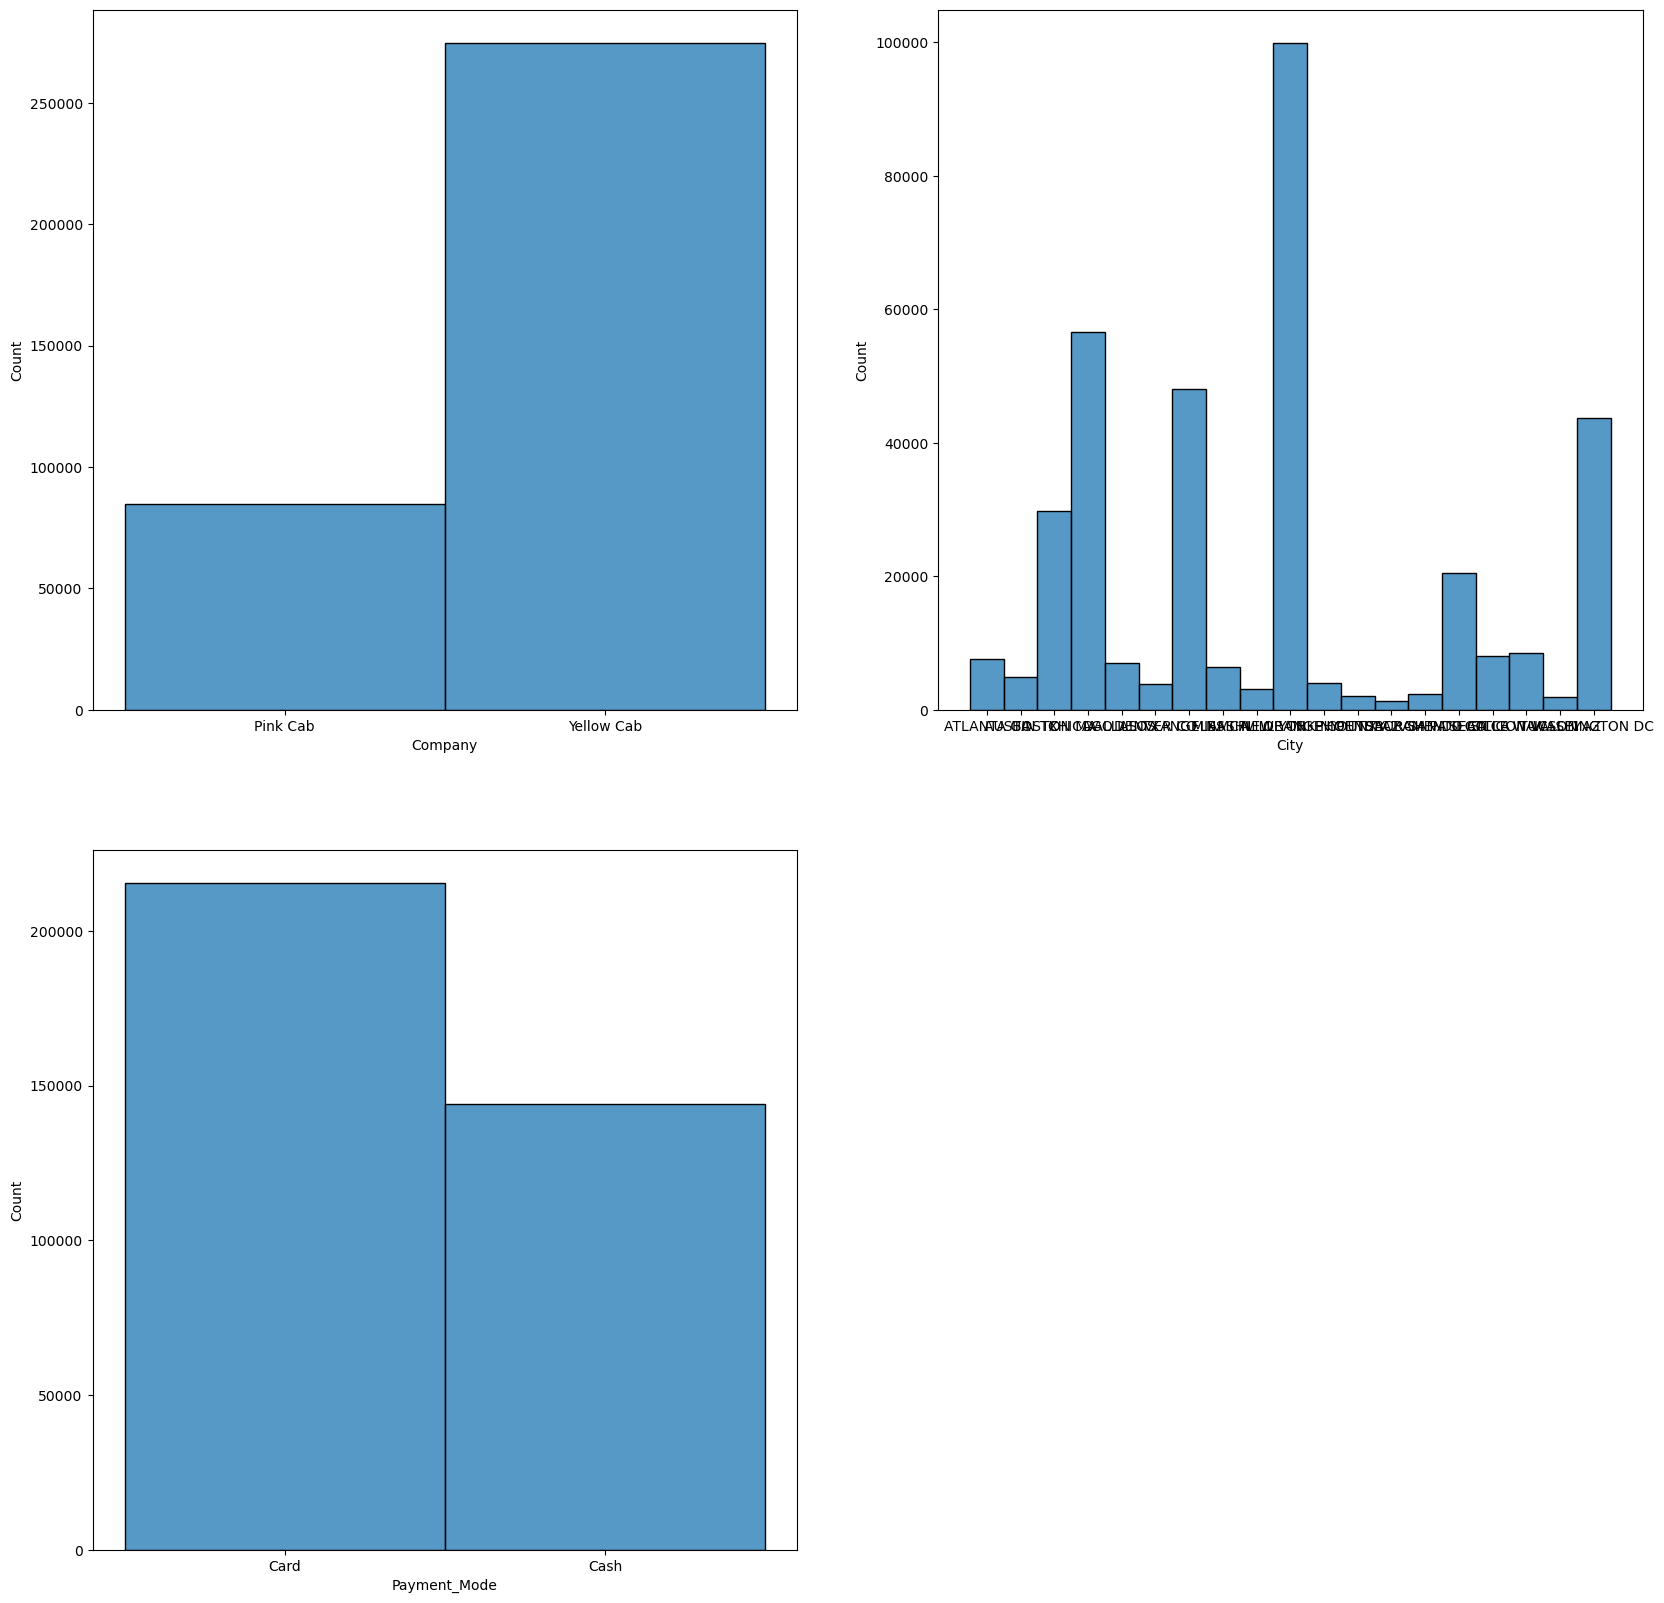

In [53]:
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in cat_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=cat_var[i])
    platenum+=1

* The yellow cab company has more records in terms of transcations compared to Pink cab
* New york city had the most transcation and PITTSBURGH PA has the lowest number of transactions
* More users paid using a card compared to cash payment.

In [80]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
 7   Customer ID     359392 non-null  int64         
 8   Payment_Mode    359392 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 24.7+ MB


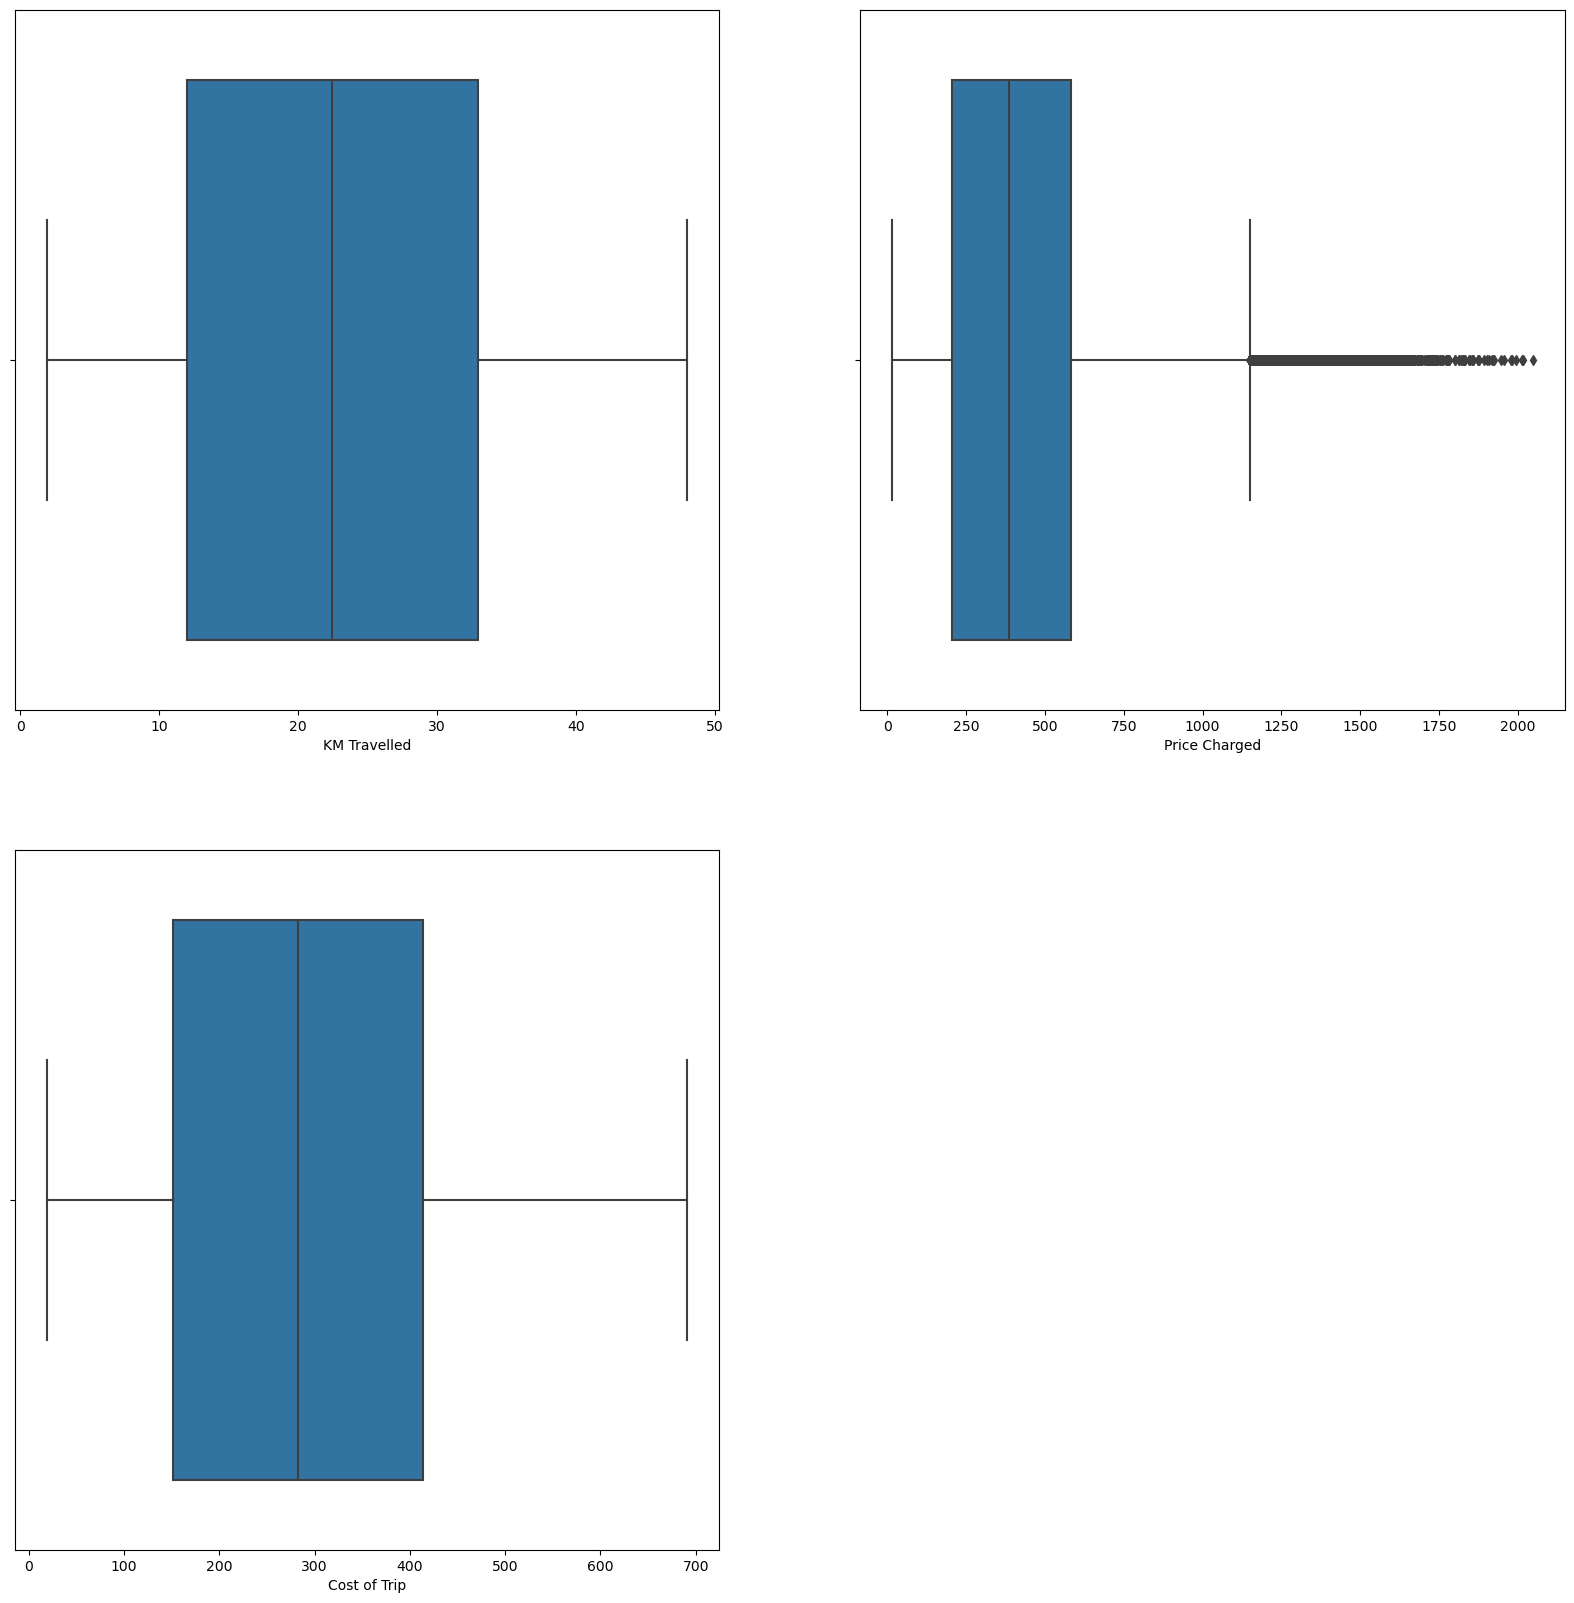

In [56]:
num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in num_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.boxplot(data=data3,x=num_var[i])
    platenum+=1

* The average KM travelled by all individuals was 22.567254
* The average price change was 423.443311
* The average cost of the trip was 286.190113

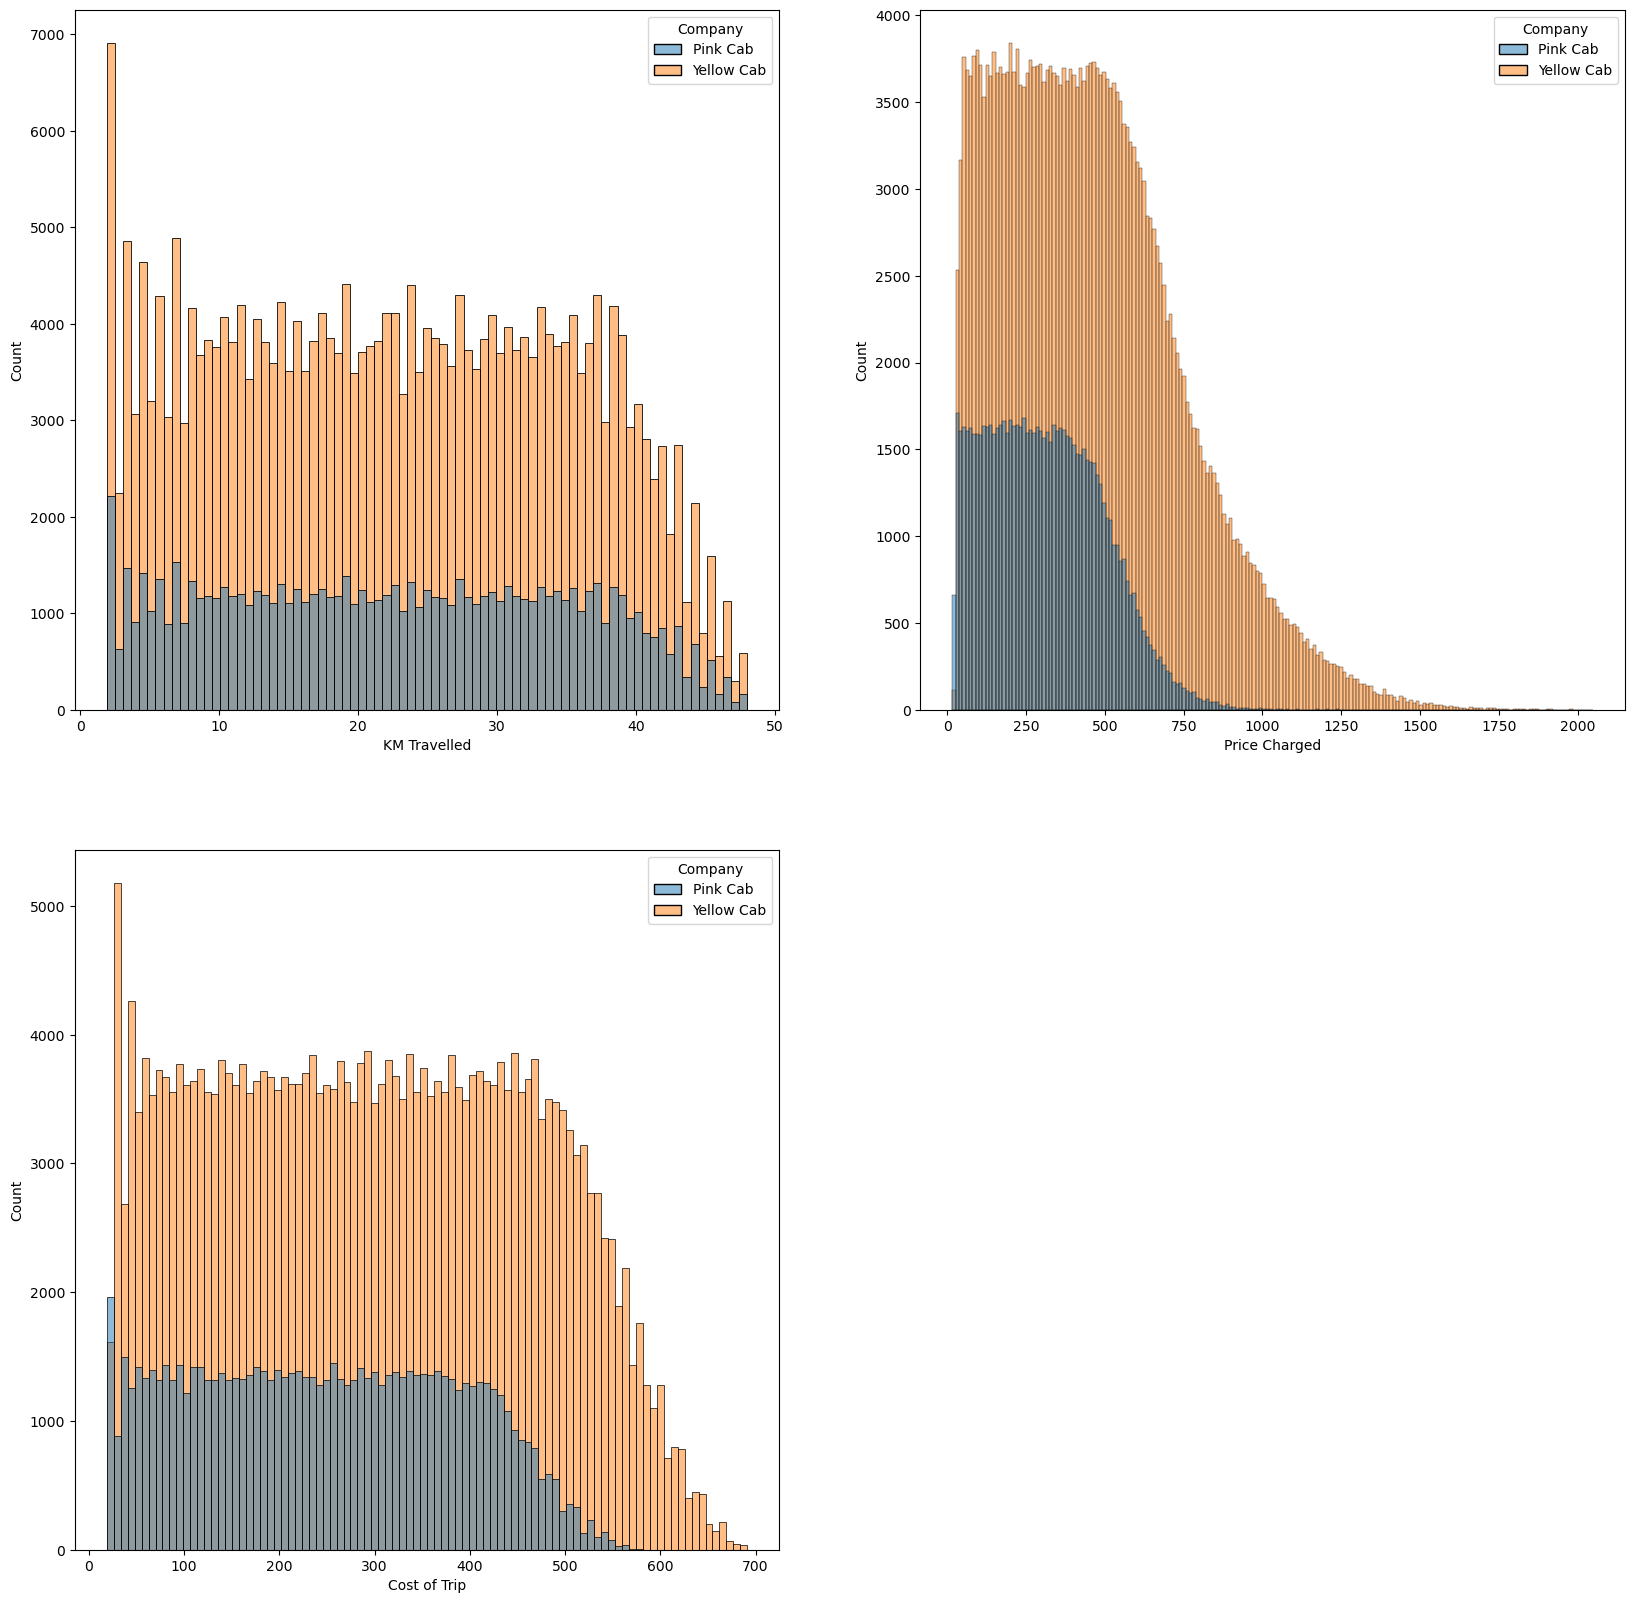

In [70]:
num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in num_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=num_var[i], hue='Company')
    platenum+=1

* The yellow cab had more KM travelled, price changes and comparably higher costs of the trips
* This maybe due to the data imbalance with more records for the yellow cab compared to the pink cab

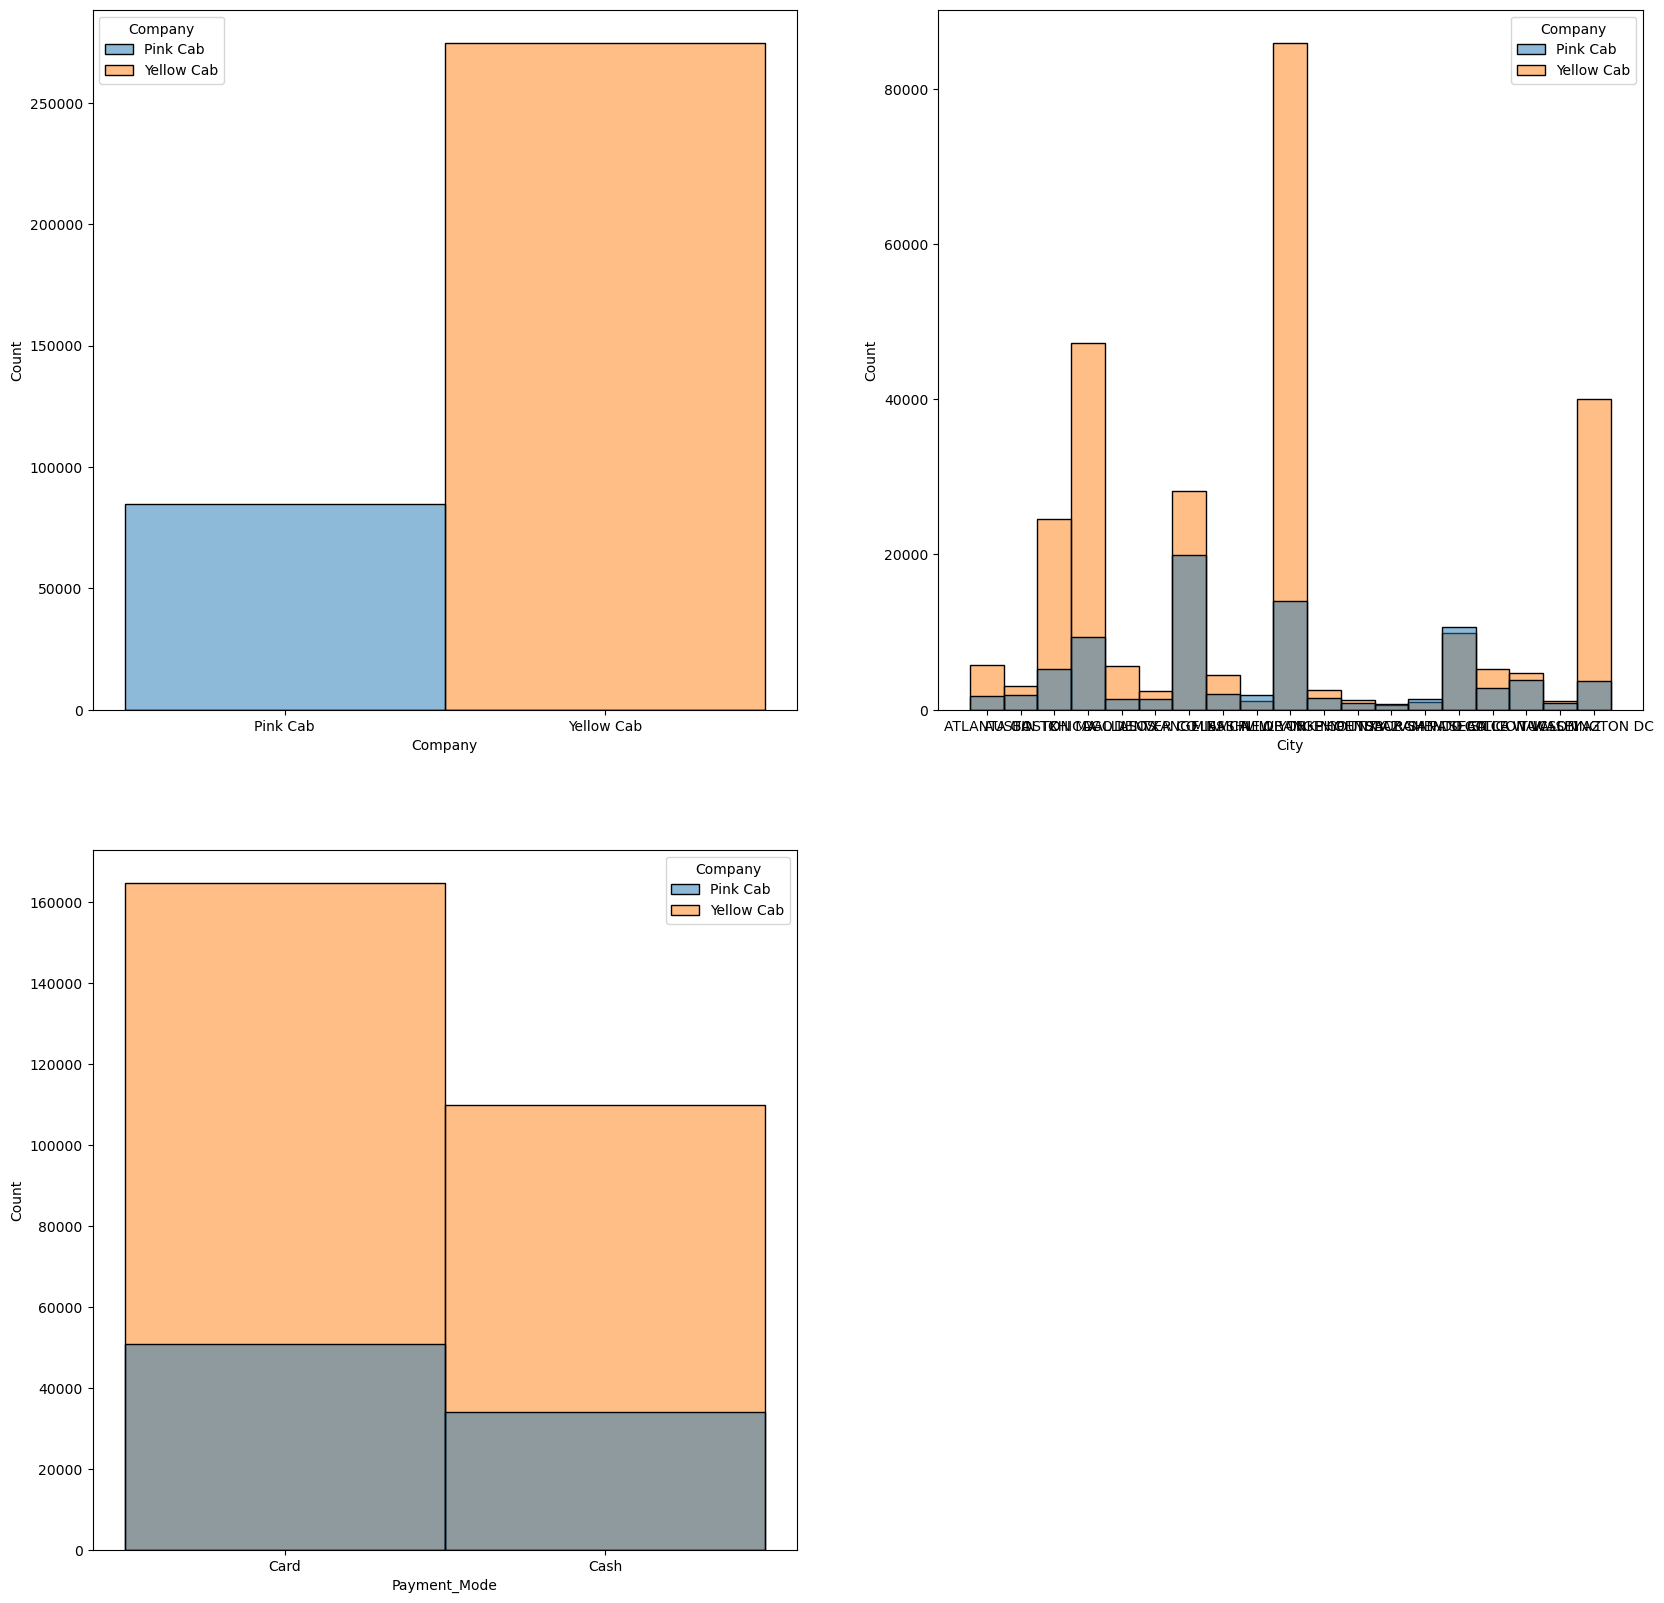

In [69]:

num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in cat_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=cat_var[i],hue='Company')
    platenum+=1

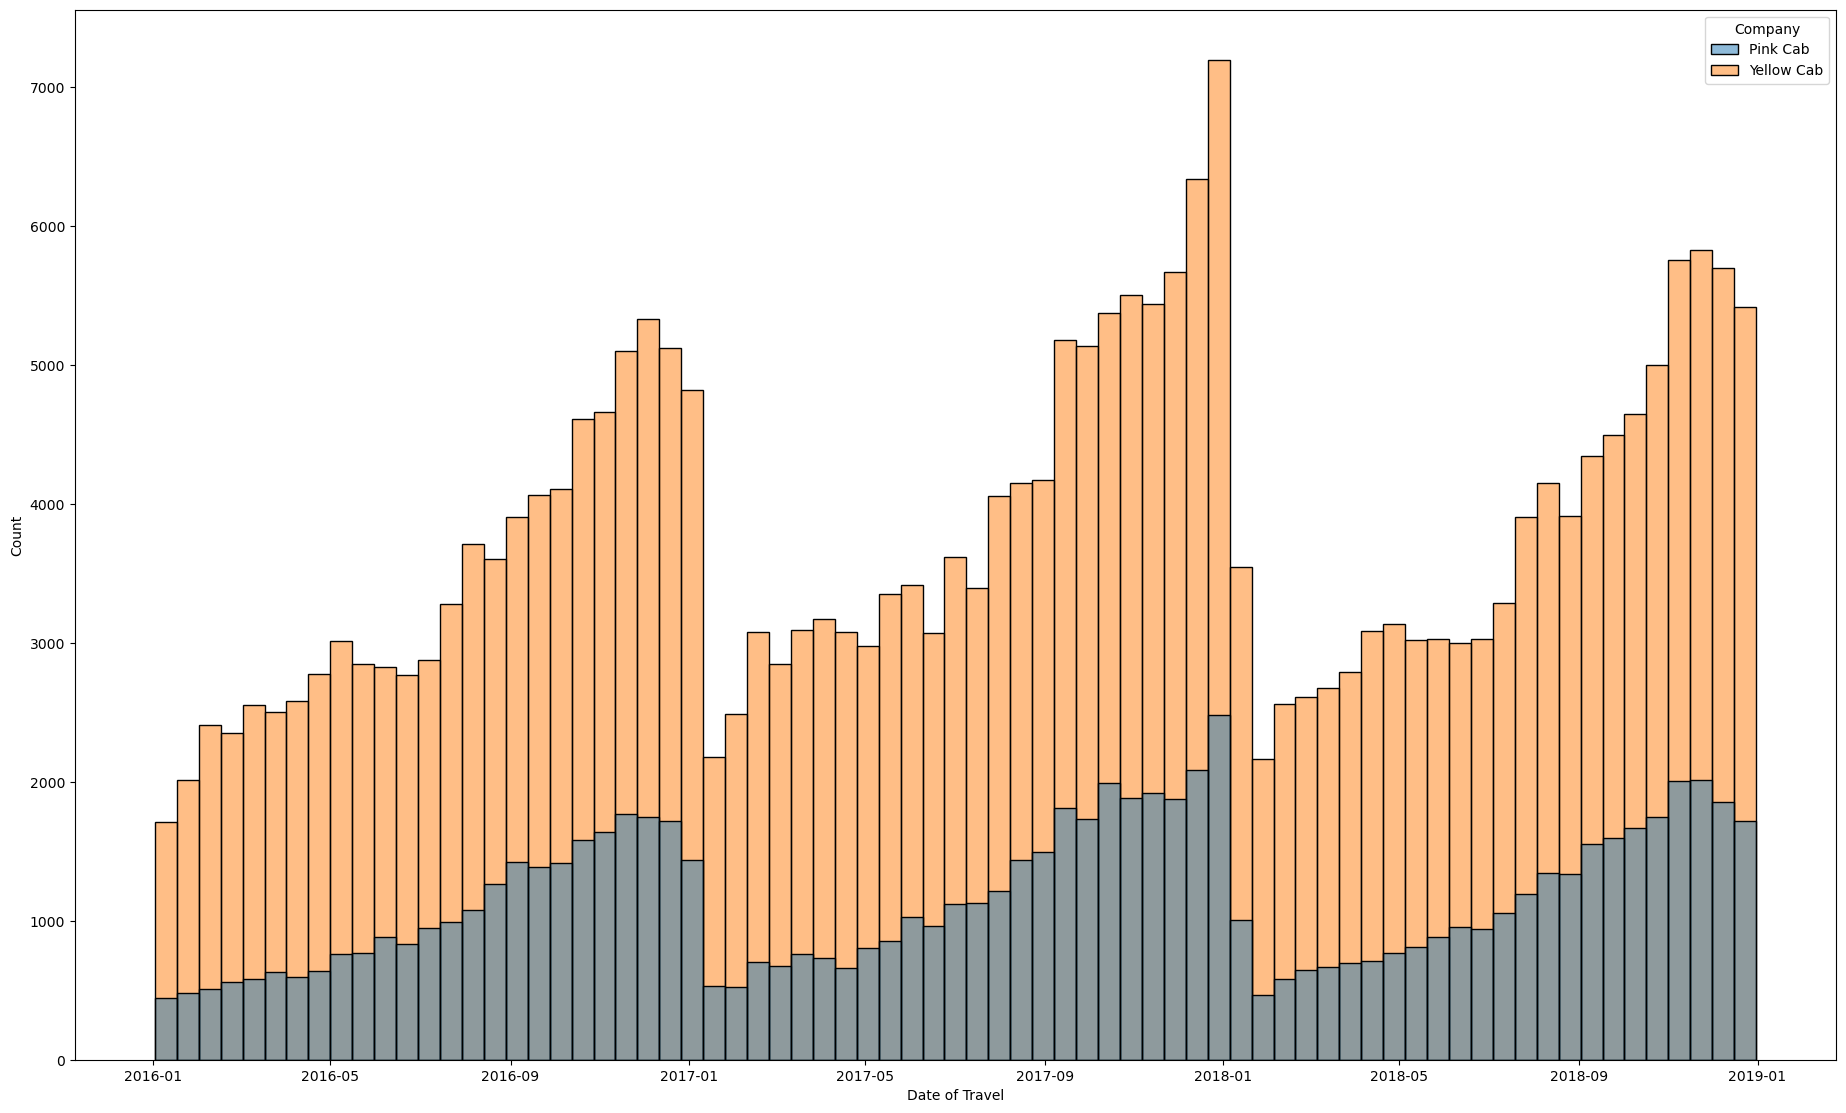

In [81]:

num_var=data3.select_dtypes('datetime64[ns]')
plt.figure(num=10, figsize=(50,30))
platenum=1
for i in num_var:
    if platenum<10:
        plt.subplot(2,2,platenum)
        sns.histplot(data=data3,x=num_var[i],hue='Company')
    platenum+=1

* The number of transactions donot change over time between the two companies, they correlate at the specific time of the year
* The number of transactions reduce at the specific time of the year, 2018-01, 2017-01 from both companies.

### Bivariate analysis

<Axes: xlabel='Price Charged', ylabel='Cost of Trip'>

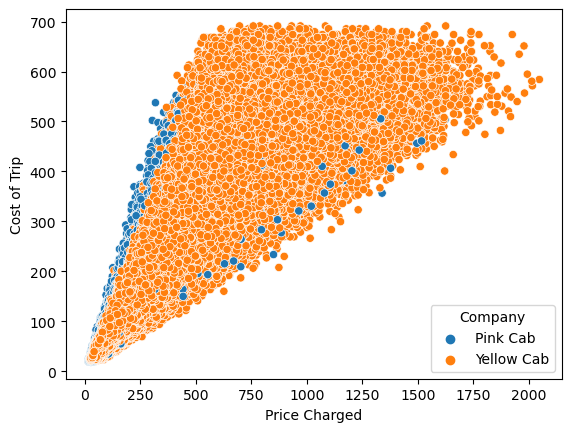

In [59]:

sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['Cost of Trip'],hue='Company')

<Axes: xlabel='Price Charged', ylabel='KM Travelled'>

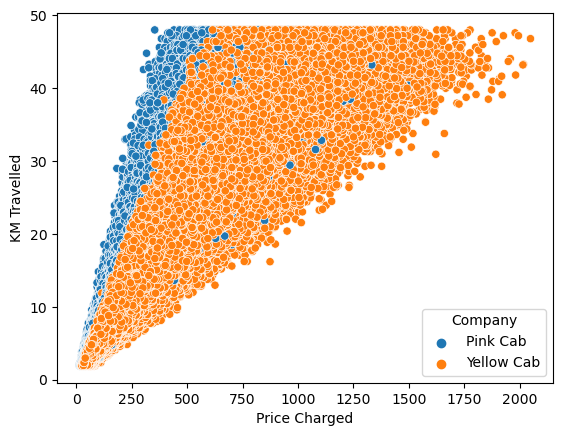

In [60]:
sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['KM Travelled'],hue='Company')

<Axes: xlabel='Cost of Trip', ylabel='KM Travelled'>

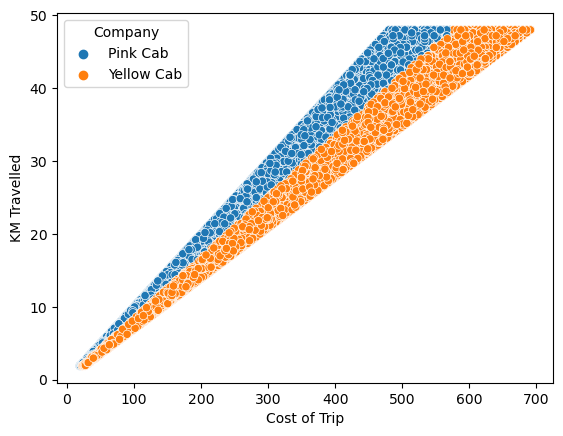

In [62]:
sns.scatterplot(data=data3,y=data3['KM Travelled'],x=data3['Cost of Trip'],hue='Company')

<Axes: xlabel='Price Charged', ylabel='Cost of Trip'>

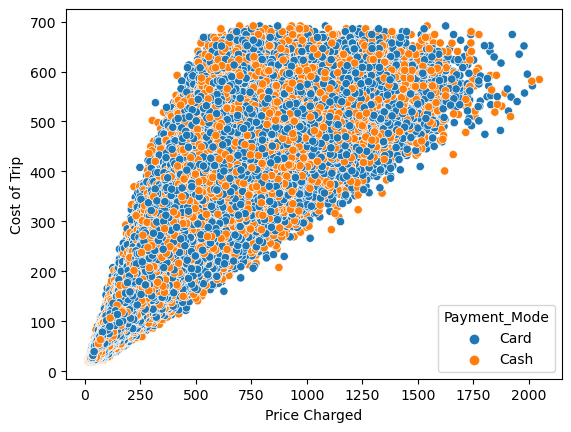

In [64]:
sns.scatterplot(data=data3,x=data3['Price Charged'],y=data3['Cost of Trip'],hue='Payment_Mode')

<Axes: xlabel='Date of Travel', ylabel='Cost of Trip'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


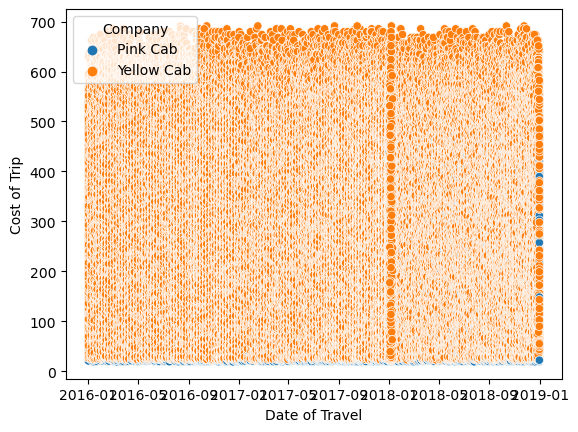

In [83]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Cost of Trip'],hue='Company')

* From the above analysis, cost of the trip is not affected by season or time of the year between all the companies

<Axes: xlabel='Date of Travel', ylabel='Price Charged'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


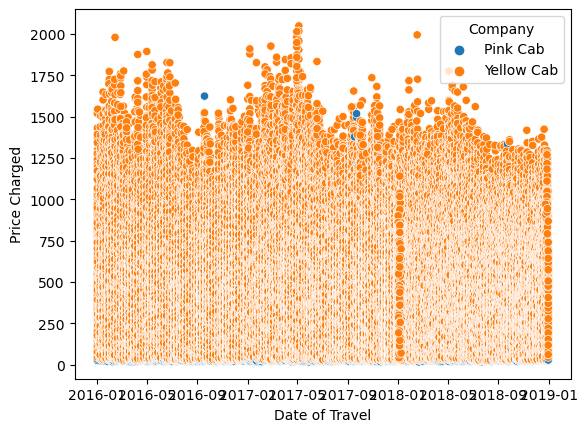

In [84]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Price Charged'],hue='Company')

* Price of the trip was not affected by season or time of the year between the different companies

<Axes: xlabel='Date of Travel', ylabel='Cost of Trip'>

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


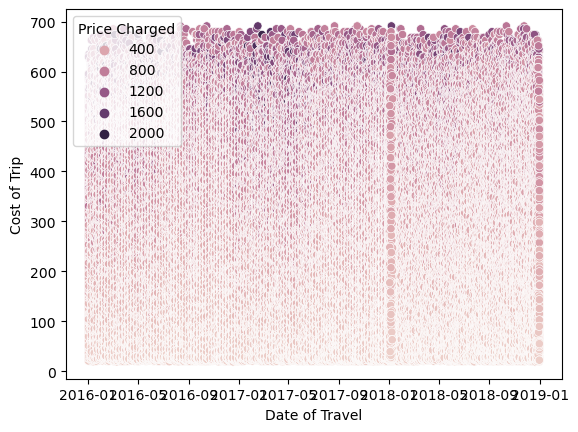

In [85]:
sns.scatterplot(data=data3,x=data3['Date of Travel'],y=data3['Cost of Trip'],hue='Price Charged')

In [67]:
data3_correlation = num_var.corr()
print(data3_correlation)

               KM Travelled  Price Charged  Cost of Trip
KM Travelled       1.000000       0.835753      0.981848
Price Charged      0.835753       1.000000      0.859812
Cost of Trip       0.981848       0.859812      1.000000


* There is a positive correlation between the numerical variables
* On analysis, an increase in the KM travelled, let to an increase in price charged
* The price charged was equally proportional to the cost of the trip, relative to the cost of the trip, a higher charge was more likely charged, this was true for both cab companies
* Analysis of the KM travelled and price charged, the longer the KM, the higher the price charged for the trip

## Creation of single master excel file with all parameters

In [16]:
# Let us look at the columns and try to group the data for descriptive analysis
data3.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode'],
      dtype='object')

In [17]:
# Count and group by 'City' and 'Company'
value_counts = data3.groupby(['City', 'Company']).size().reset_index(name='Count')

# Display the result
print(value_counts)

              City     Company  Count
0       ATLANTA GA    Pink Cab   1762
1       ATLANTA GA  Yellow Cab   5795
2        AUSTIN TX    Pink Cab   1868
3        AUSTIN TX  Yellow Cab   3028
4        BOSTON MA    Pink Cab   5186
5        BOSTON MA  Yellow Cab  24506
6       CHICAGO IL    Pink Cab   9361
7       CHICAGO IL  Yellow Cab  47264
8        DALLAS TX    Pink Cab   1380
9        DALLAS TX  Yellow Cab   5637
10       DENVER CO    Pink Cab   1394
11       DENVER CO  Yellow Cab   2431
12  LOS ANGELES CA    Pink Cab  19865
13  LOS ANGELES CA  Yellow Cab  28168
14        MIAMI FL    Pink Cab   2002
15        MIAMI FL  Yellow Cab   4452
16    NASHVILLE TN    Pink Cab   1841
17    NASHVILLE TN  Yellow Cab   1169
18     NEW YORK NY    Pink Cab  13967
19     NEW YORK NY  Yellow Cab  85918
20   ORANGE COUNTY    Pink Cab   1513
21   ORANGE COUNTY  Yellow Cab   2469
22      PHOENIX AZ    Pink Cab    864
23      PHOENIX AZ  Yellow Cab   1200
24   PITTSBURGH PA    Pink Cab    682
25   PITTSBU

In [82]:
# we take a look at the this dataset for analysis to get insights
data4=pd.read_csv('Customer_ID.csv')

In [21]:
data4.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')

In [29]:
data4['Customer ID'].unique()

array([29290, 27703, 28712, ..., 41414, 41677, 39761], dtype=int64)

In [32]:
data4.drop('Customer ID', axis=1).describe()

Age  Income (USD/Month)
count  49171.000000        49171.000000
mean      35.363121        15015.631856
std       12.599066         8002.208253
min       18.000000         2000.000000
25%       25.000000         8289.500000
50%       33.000000        14656.000000
75%       42.000000        21035.000000
max       65.000000        35000.000000

In [84]:
# Creation of class boundaries for the age will be good for analysis
# Define class boundaries
class_boundaries = [10,20,30,40,50,60,70] 

# Create a new column 'AgeGroup' based on class boundaries
data4['AgeGroup'] = pd.cut(data4['Age'], bins=class_boundaries, labels=['10-19', '20-29', '30-39', '40-49','50-59','60-69'], right=False)

# Group the data based on 'AgeGroup'
grouped_data = data4.groupby('AgeGroup').agg({'Age': 'count', 'Income (USD/Month)': ['sum','mean', 'min', 'max']}).reset_index()

# Output the result to a CSV file
grouped_data.to_csv('C:/Users/USER/Documents/Python Scripts/CustomerID_grouped.csv', index=False)

# Display the grouped data
print(grouped_data)

  AgeGroup    Age Income (USD/Month)                           
            count                sum          mean   min    max
0    10-19   3112           46211199  14849.357005  2027  34977
1    20-29  15797          238031282  15068.132050  2000  34995
2    30-39  15579          233444503  14984.562745  2000  34996
3    40-49   6336           94991776  14992.388889  2001  34984
4    50-59   5229           78960502  15100.497609  2009  35000
5    60-69   3118           46694372  14975.744708  2027  34996


In [89]:
data3.head()

Transaction ID Date of Travel   Company        City  KM Travelled  \
0        10000011     2016-01-08  Pink Cab  ATLANTA GA         30.45   
1        10000012     2016-01-06  Pink Cab  ATLANTA GA         28.62   
2        10000013     2016-01-02  Pink Cab  ATLANTA GA          9.04   
3        10000014     2016-01-07  Pink Cab  ATLANTA GA         33.17   
4        10000015     2016-01-03  Pink Cab  ATLANTA GA          8.73   

   Price Charged  Cost of Trip  Customer ID Payment_Mode  
0         370.95       313.635        29290         Card  
1         358.52       334.854        27703         Card  
2         125.20        97.632        28712         Cash  
3         377.40       351.602        28020         Cash  
4         114.62        97.776        27182         Card

In [41]:
data5=pd.read_csv('Transaction_ID.csv')

In [98]:
## Creation of single document containing all merged data concerned with the customers, transactions and related fields
merged_df = pd.merge(data3, data4, on='Customer ID', how='inner')

# Save the merged DataFrame to a new Excel file
merged_df.to_excel('C:/Users/USER/Documents/Python Scripts/Merge_done_customer_new.xlsx', index=False)

In [109]:
# The final merged file
data5=pd.read_excel('Merge_done_customer_new.xlsx')

In [110]:
data5.tail()

Transaction ID Date of Travel     Company            City  \
359387        10439790     2018-01-07  Yellow Cab      SEATTLE WA   
359388        10439799     2018-01-03  Yellow Cab  SILICON VALLEY   
359389        10439838     2018-01-04  Yellow Cab       TUCSON AZ   
359390        10439840     2018-01-06  Yellow Cab       TUCSON AZ   
359391        10439846     2018-01-04  Yellow Cab       TUCSON AZ   

        KM Travelled  Price Charged  Cost of Trip  Profit  Customer ID  \
359387         16.66         261.18      213.9144     NaN        38520   
359388         13.72         277.97      172.8720     NaN        12490   
359389         19.00         303.77      232.5600     NaN        41414   
359390          5.60          92.42       70.5600     NaN        41677   
359391         13.30         244.65      180.3480     NaN        39761   

       Payment_Mode  Gender  Age  Income (USD/Month) AgeGroup  
359387         Card  Female   42               19417    40-49  
359388         Cash    Male   33               18713    30-39  
359389         Card    Male   38                3960    30-39  
359390         Cash    Male   23               19454    20-29  
359391         Card  Female   32               10128    30-39

In [146]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date of Travel  359392 non-null  datetime64[ns]
 1   Company         359392 non-null  object        
 2   City            359392 non-null  object        
 3   KM Travelled    359392 non-null  float64       
 4   Price Charged   359392 non-null  float64       
 5   Cost of Trip    359392 non-null  float64       
 6   Payment_Mode    359392 non-null  object        
 7   Gender          359392 non-null  object        
 8   AgeGroup        359392 non-null  object        
 9   profits         359392 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(5)
memory usage: 27.4+ MB


In [113]:
data5.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Profit', 'Customer ID',
       'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'AgeGroup',
       'profits'],
      dtype='object')

In [112]:
# Lets create another column of profits, out of the subtraction between cost of trip from price charged
data5['profits']= data5['Price Charged']-data5['Cost of Trip']

In [114]:
data5.head()

Transaction ID Date of Travel     Company        City  KM Travelled  \
0        10000011     2016-01-08    Pink Cab  ATLANTA GA         30.45   
1        10351127     2018-07-21  Yellow Cab  ATLANTA GA         26.19   
2        10412921     2018-11-23  Yellow Cab  ATLANTA GA         42.55   
3        10000012     2016-01-06    Pink Cab  ATLANTA GA         28.62   
4        10320494     2018-04-21  Yellow Cab  ATLANTA GA         36.38   

   Price Charged  Cost of Trip  Profit  Customer ID Payment_Mode Gender  Age  \
0         370.95      313.6350     NaN        29290         Card   Male   28   
1         598.70      317.4228     NaN        29290         Cash   Male   28   
2         792.05      597.4020     NaN        29290         Card   Male   28   
3         358.52      334.8540     NaN        27703         Card   Male   27   
4         721.10      467.1192     NaN        27703         Card   Male   27   

   Income (USD/Month) AgeGroup   profits  
0               10813    20-29   57.3150  
1               10813    20-29  281.2772  
2               10813    20-29  194.6480  
3                9237    20-29   23.6660  
4                9237    20-29  253.9808

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data6= data5.drop(['Customer ID','Transaction ID','Age','Income (USD/Month)','Profit'],axis=1,inplace=True)

### Univariate analysis

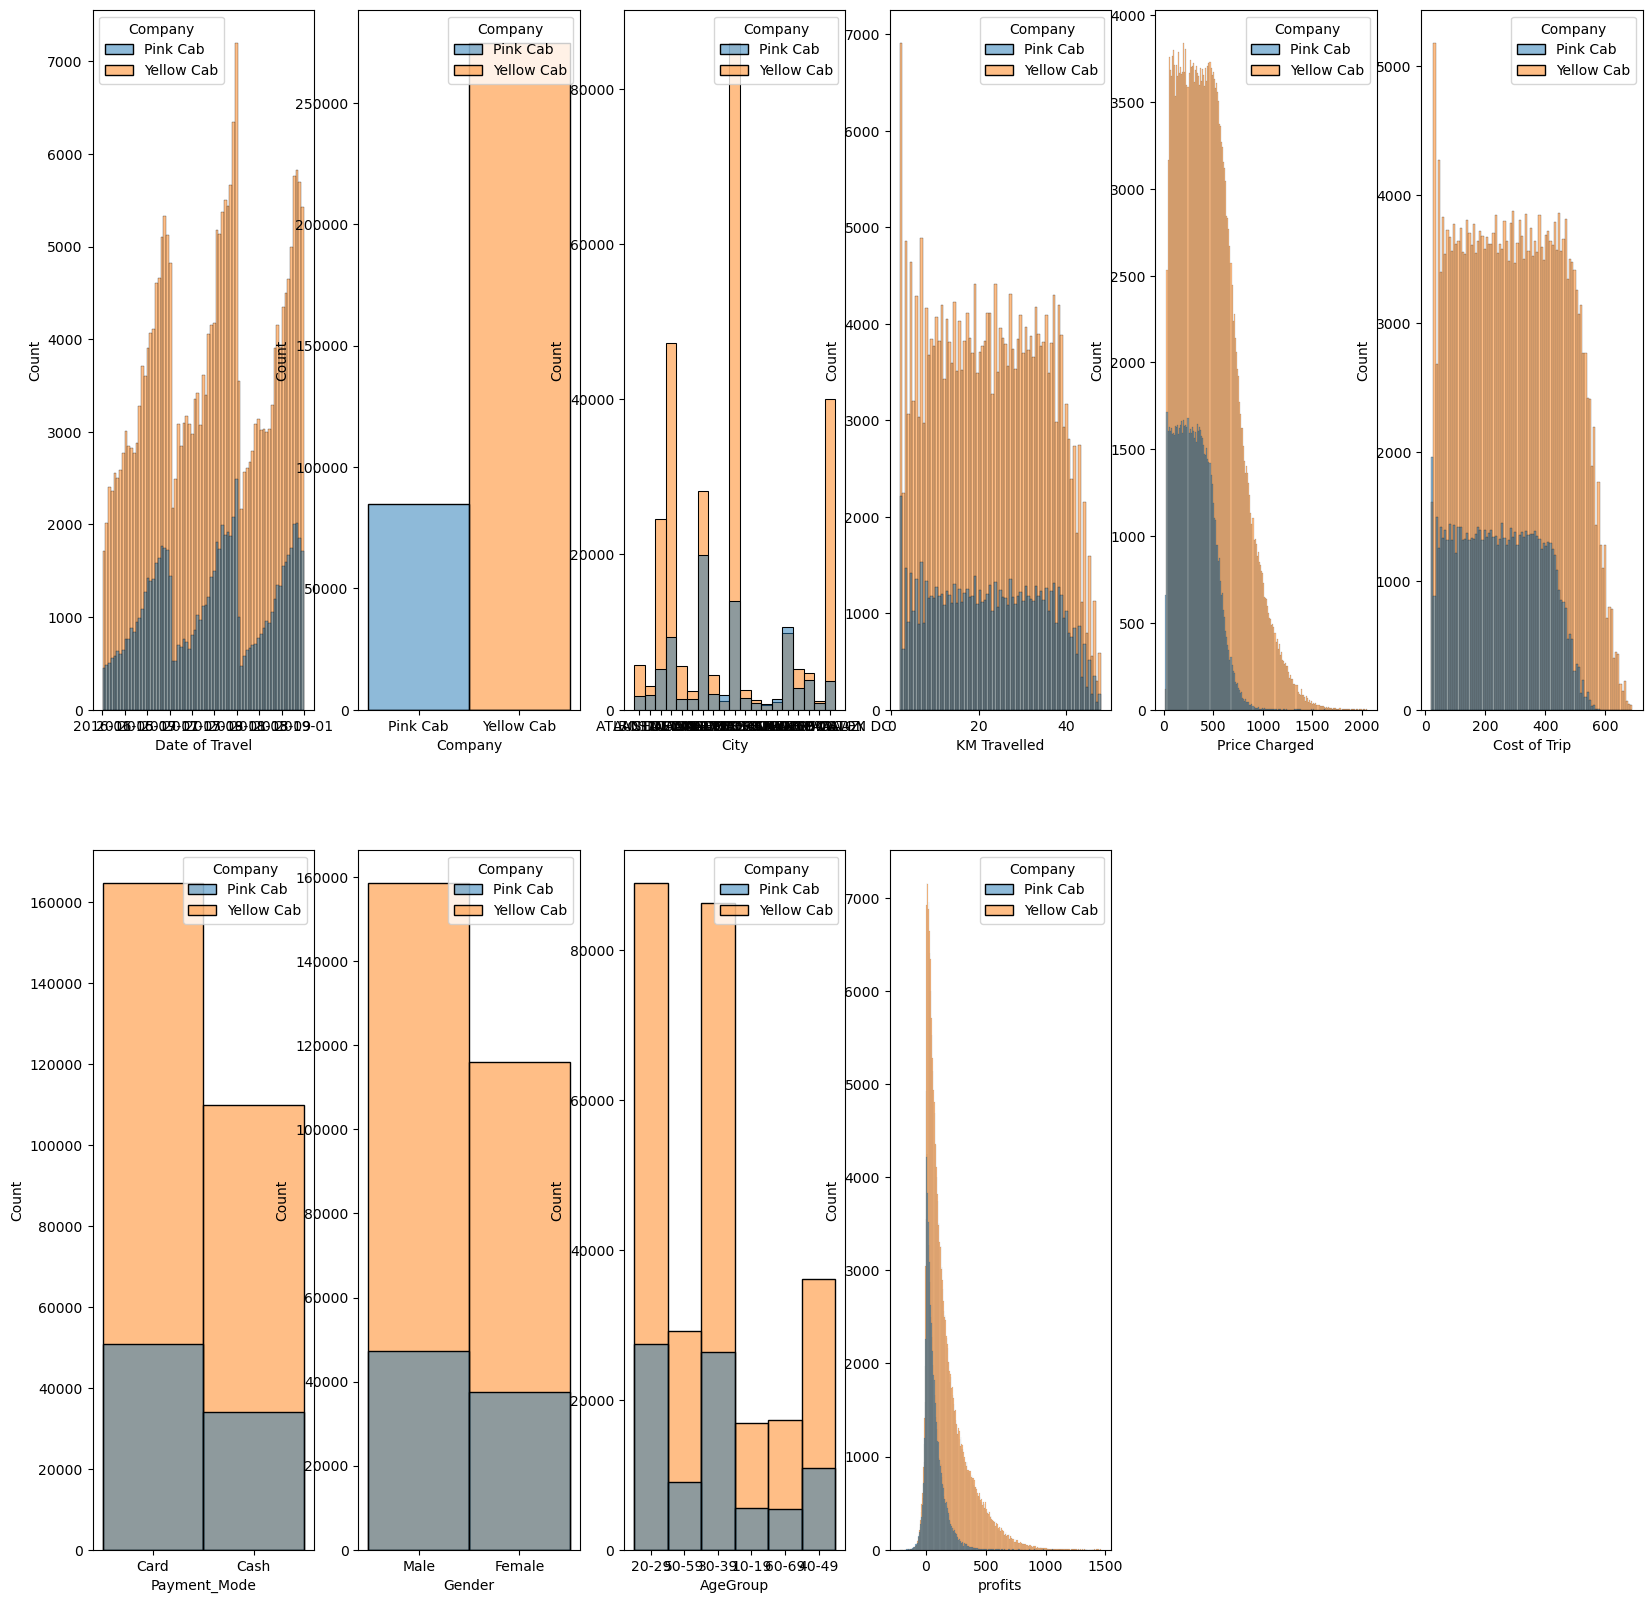

In [119]:
#num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(20,20))
platenum=1
for i in data6:
    if platenum<12:
        plt.subplot(2,6,platenum)
        sns.histplot(data=data6,x=data6[i],hue='Company')
    platenum+=1

### Bivariate analysis

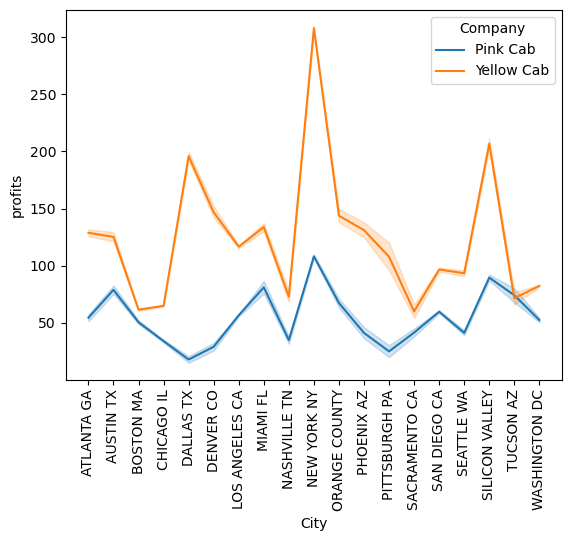

In [125]:
sns.lineplot(data=data6,x=data5['City'],y=data5['profits'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

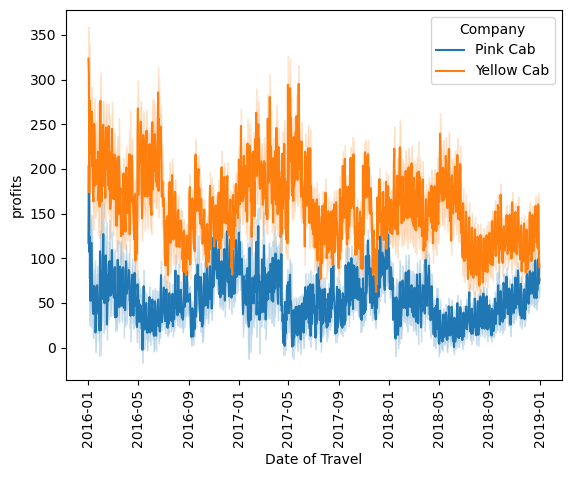

In [129]:
sns.lineplot(data=data6,x=data5['Date of Travel'],y=data5['profits'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

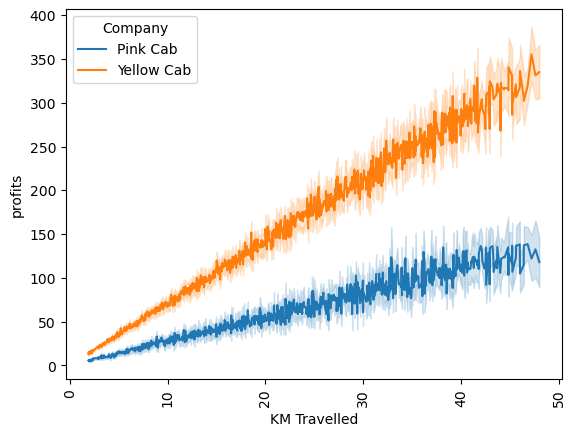

In [130]:
sns.lineplot(data=data6,x=data5['KM Travelled'],y=data5['profits'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

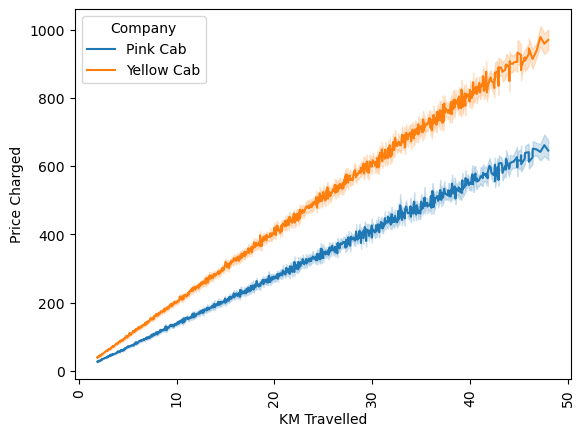

In [133]:
sns.lineplot(data=data6,y=data5['Price Charged'],x=data5['KM Travelled'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_16060\2361422731.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,6,platenum)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USER\AppData\Local\Temp\ipykernel_16060\2361422731.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,6,platenum)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_

KeyboardInterrupt: 

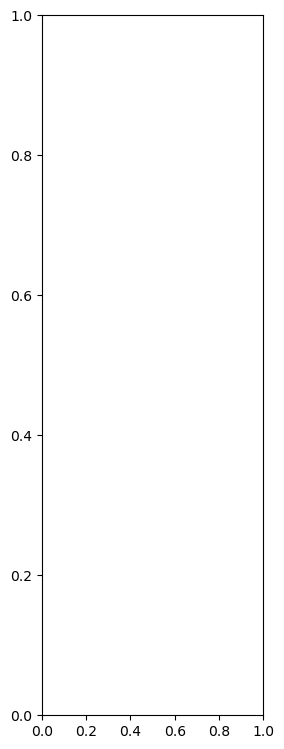

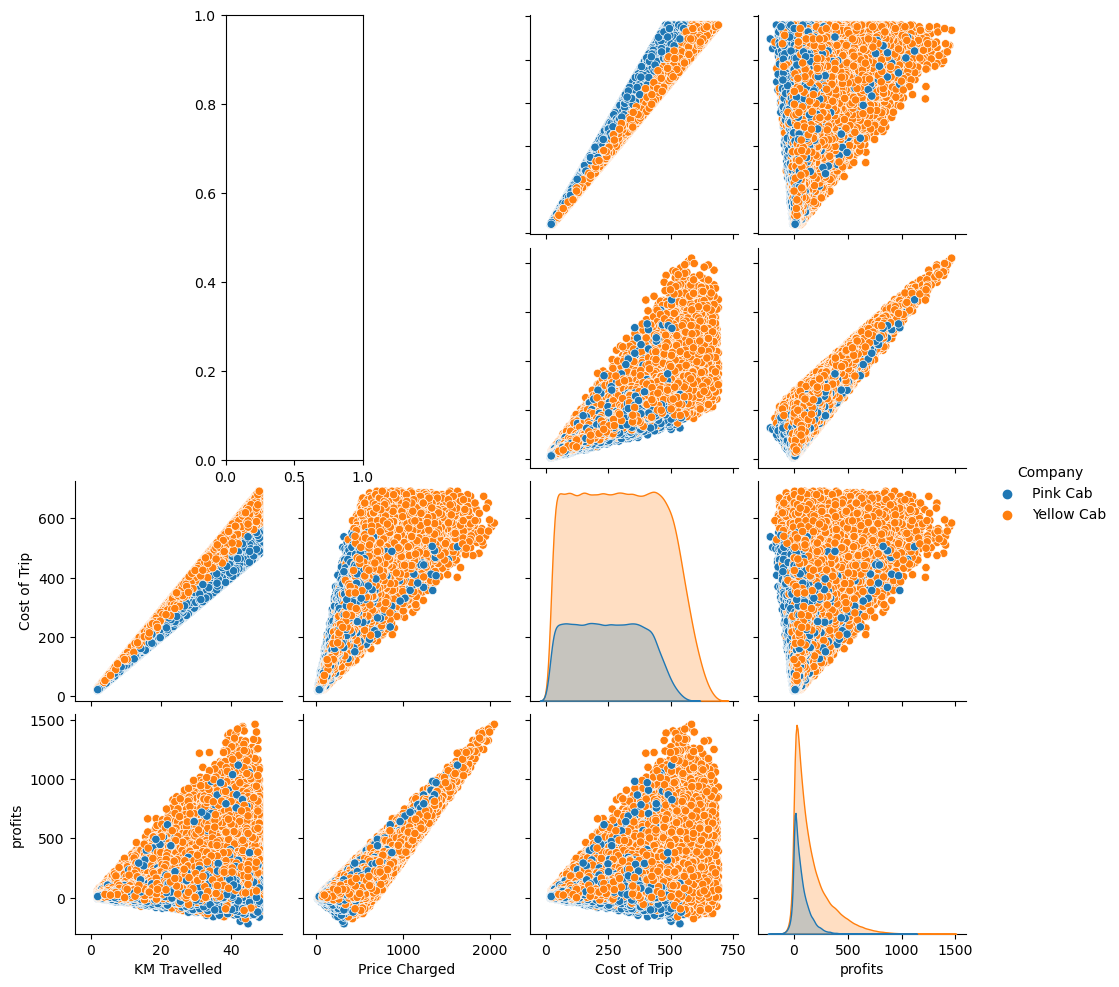

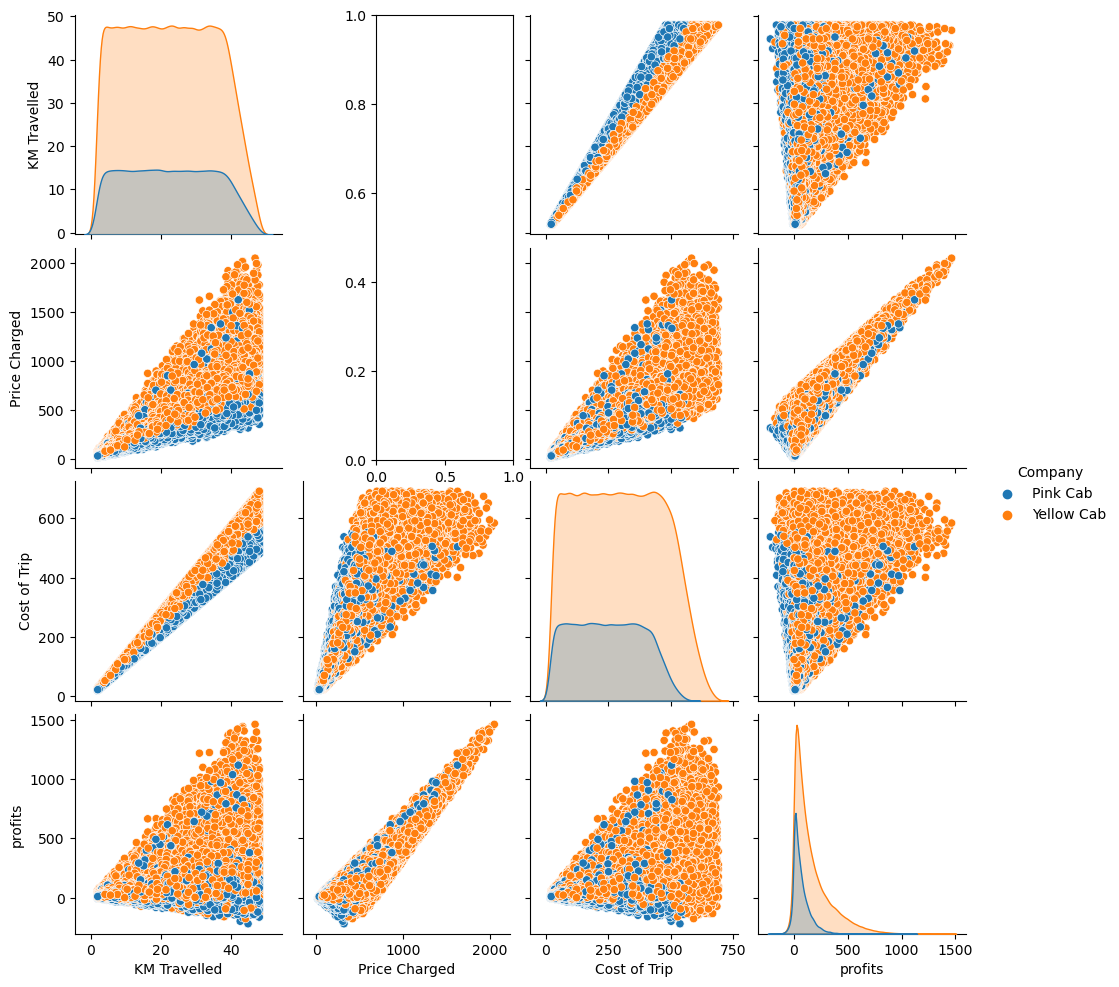

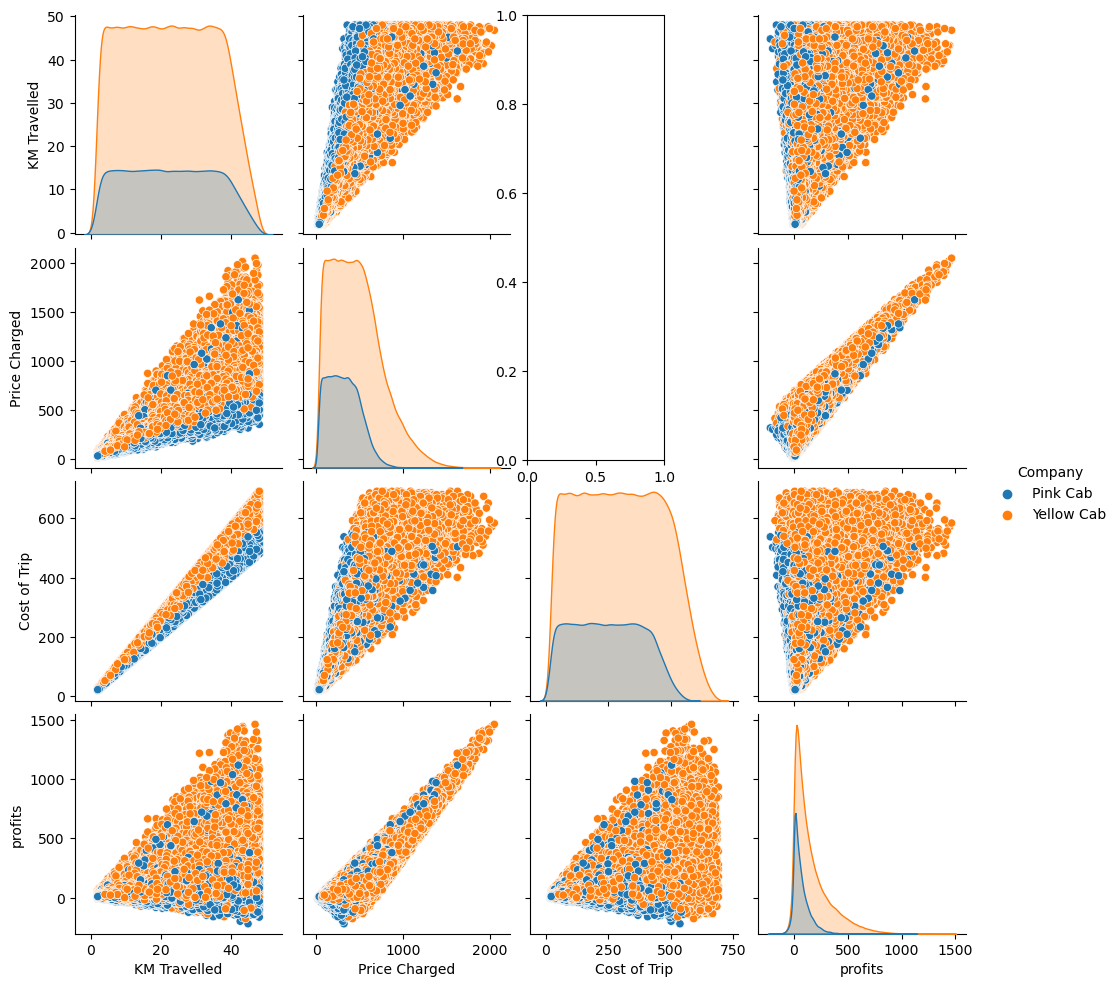

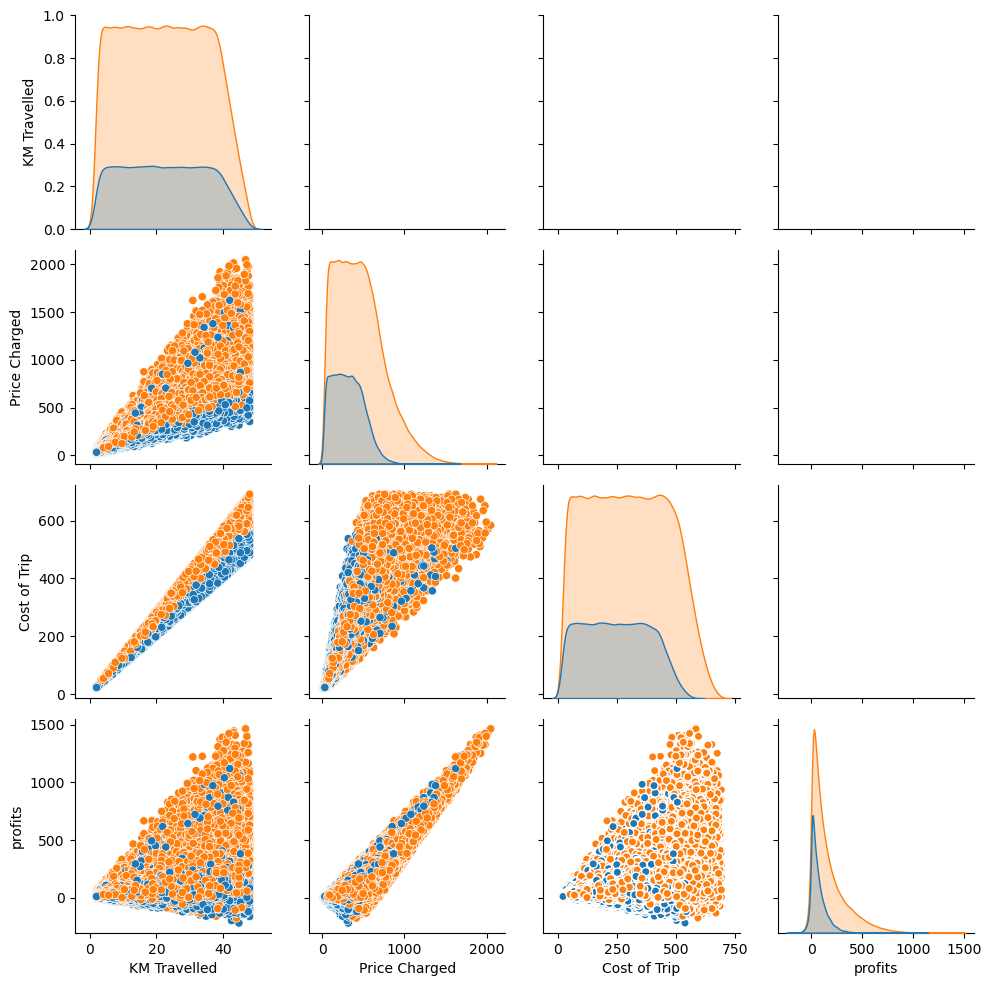

In [121]:
#num_var=data3.select_dtypes('float64')
plt.figure(num=10, figsize=(30,20))
platenum=1
for i in data6:
    if platenum<16:
        plt.subplot(2,8,platenum)
        sns.pairplot(data=data6,hue='Company')
    platenum+=1

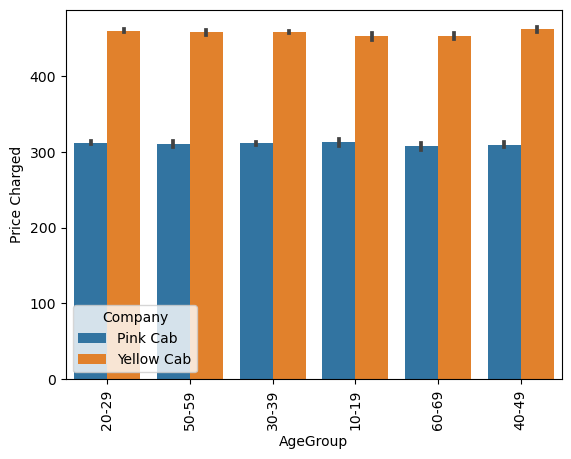

In [158]:
sns.barplot(data=data5,y=data5['Price Charged'],x=data5['AgeGroup'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

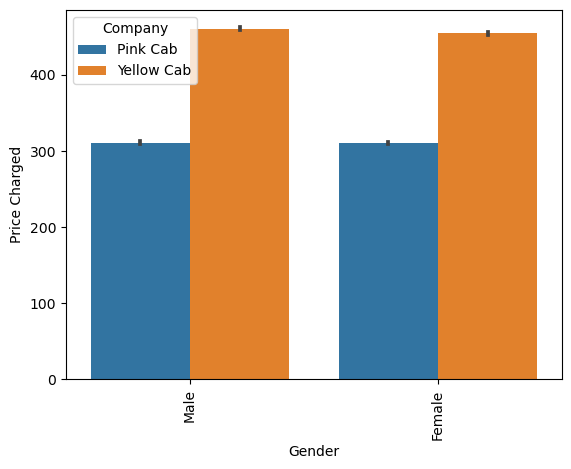

In [157]:
sns.barplot(data=data5,y=data5['Price Charged'],x=data5['Gender'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

In [ ]:
sns.barplot(data=data5,y=data5['Price Charged'],x=data5['Gender'],hue='Company')

plt.xticks(rotation='vertical')
plt.show()

#### Grouping data and cross tabulation

In [54]:

# Group the data based on 'AgeGroup'
grouped_data = data3.groupby('AgeGroup').agg({'Age': 'count','Gender':'count','Payment_Mode':'count','Income (USD/Month)': ['sum','mean']}).reset_index()
print(grouped_data)

  AgeGroup     Age  Gender Payment_Mode Income (USD/Month)              
             count   count        count                sum          mean
0    10-19   27513   27513        27513          411733030  14965.035801
1    20-29  141570  141570       141570         2144135678  15145.409889
2    30-39  138788  138788       138788         2086894159  15036.560502
3    40-49   57781   57781        57781          870748024  15069.798446
4    50-59   46827   46827        46827          719660002  15368.484037
5    60-69   27619   27619        27619          408868216  14803.874724


In [60]:
df = pd.DataFrame(data3)

# Function for cross-tabulation
def cross_tabulation(df, group_column, categorical_column, numerical_column):
    # Cross-tabulation for categorical data
    cross_tab_cat = pd.crosstab(df[group_column], df[categorical_column])

    # Cross-tabulation for numerical data (mean)
    cross_tab_num_mean = df.groupby(group_column).agg({numerical_column: 'mean'})

    # Display the results
    print("Cross-Tabulation for Categorical Data:")
    print(cross_tab_cat)
    
    print("\nCross-Tabulation for Numerical Data (Mean):")
    print(cross_tab_num_mean)

# Example usage
cross_tabulation(df, 'Payment_Mode', 'Gender', 'Income (USD/Month)')

Cross-Tabulation for Categorical Data:
Gender        Female    Male
Payment_Mode                
Card          110172  153819
Cash           73315  102792

Cross-Tabulation for Numerical Data (Mean):
              Income (USD/Month)
Payment_Mode                    
Card                15085.424219
Cash                15102.312140


In [58]:
# Function for cross-tabulation
def cross_tabulation(df, group_column, categorical_column, numerical_column):
    # Cross-tabulation for categorical data
    cross_tab_cat = pd.crosstab(df[group_column], df[categorical_column])

    # Cross-tabulation for numerical data (mean)
    cross_tab_num_mean = df.groupby(group_column).agg({numerical_column: 'mean'})

    # Display the results
    print("Cross-Tabulation for Categorical Data:")
    print(cross_tab_cat)
    
    print("\nCross-Tabulation for Numerical Data (Mean):")
    print(cross_tab_num_mean)

# Example usage
cross_tabulation(df, 'AgeGroup', 'Gender', 'Income (USD/Month)')

Cross-Tabulation for Categorical Data:
Gender    Female   Male
AgeGroup               
10-19      11093  16420
20-29      59913  81657
30-39      57348  81440
40-49      24141  33640
50-59      19186  27641
60-69      11806  15813

Cross-Tabulation for Numerical Data (Mean):
          Income (USD/Month)
AgeGroup                    
10-19           14965.035801
20-29           15145.409889
30-39           15036.560502
40-49           15069.798446
50-59           15368.484037
60-69           14803.874724


In [147]:
num_var= data5.select_dtypes('float64')

In [148]:
data6_correlation = num_var.corr()
print(data6_correlation)

               KM Travelled  Price Charged  Cost of Trip   profits
KM Travelled       1.000000       0.835753      0.981848  0.462768
Price Charged      0.835753       1.000000      0.859812  0.864154
Cost of Trip       0.981848       0.859812      1.000000  0.486056
profits            0.462768       0.864154      0.486056  1.000000


### Model building